# Task 1 - prediction using supervised Ml dataset

### Target:
Predict the percentage of an student based on the no. of study hours


# 1. Importing libraries and data

In [1]:
# Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

In [3]:
# reading data
dataset = pd.read_csv("prediction using supervised Ml dataset.csv")

In [4]:
dataset.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [5]:
dataset.shape

(25, 2)

In [6]:
dataset.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [7]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


- This data don't have null values.
- There is no need of data cleaning step.

# 2. Data Visualization

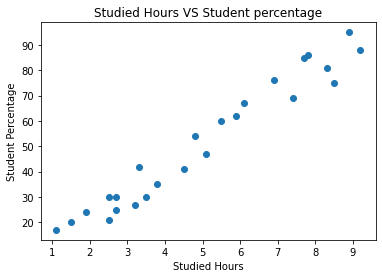

In [8]:
# Scatter plot
plt.scatter(dataset['Hours'], dataset['Scores'])
plt.title('Studied Hours VS Student percentage')
plt.xlabel('Studied Hours')
plt.ylabel('Student Percentage')
plt.show()

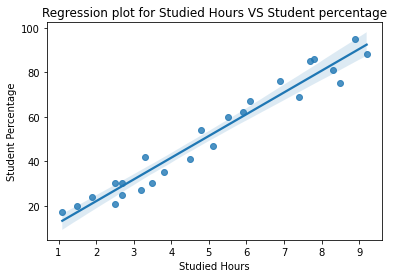

In [9]:
# Regression plot
sns.regplot(x = dataset['Hours'], y = dataset['Scores'])
plt.title('Regression plot for Studied Hours VS Student percentage')
plt.xlabel('Studied Hours')
plt.ylabel('Student Percentage')
plt.show()

As the variables are continuous, we will use pearson correlation to measure the strength of the correlation between these variables.

In [10]:
c = dataset.corr()
c

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


In [11]:
# sns.heatmap(c,cmap="BrBG", annot=True)

The variables are positively correlated
- The scatter plot and regression plot confirm this.
- The Pearson correlation value is alomst 1.

# 3. Model Training

In [12]:
# Splitting the data into X(independent variable) and Y(dependent variable)
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

In [13]:
# Splitting the data into training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)

In [14]:
# Training the simple linear regression model on training set
regressor = LinearRegression()
regressor.fit(X_train, y_train)
print("Training..completed!")

Training..completed!


In [15]:
# Pridicting the test set results
y_pred = regressor.predict(X_test)
print(y_pred)

[16.84472176 33.74557494 75.50062397 26.7864001  60.58810646 39.71058194
 20.8213931 ]


# Comparing the predicted marks with the actual marks 

In [16]:
prediction_ds = pd.DataFrame({'Hours': [i[0] for i in X_test], 'actual marks' : [y for y in y_test], 'Predicted marks': [k for k in y_pred]})
prediction_ds

,Hours,actual marks,Predicted marks
0,1.5,20,16.844722
1,3.2,27,33.745575
2,7.4,69,75.500624
3,2.5,30,26.786400
4,5.9,62,60.588106
5,3.8,35,39.710582
6,1.9,24,20.821393


***Visually***

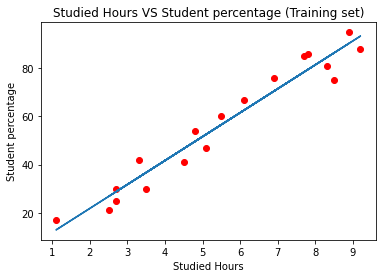

In [17]:
# Visualising the training set results
plt.scatter(X_train, y_train, color = 'red')
plt.plot(X_train, regressor.predict(X_train))
plt.title('Studied Hours VS Student percentage (Training set)')
plt.xlabel('Studied Hours')
plt.ylabel('Student percentage')
plt.show()

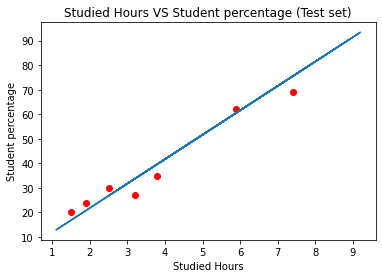

In [18]:
# Visualising the test set results
plt.scatter(X_test, y_test, color = 'red')
plt.plot(X_train, regressor.predict(X_train))
plt.title('Studied Hours VS Student percentage (Test set)')
plt.xlabel('Studied Hours')
plt.ylabel('Student percentage')
plt.show()

# Evaluating the model

In [19]:
MAE = mean_absolute_error(y_test, y_pred)
print('Mean absolute error: ', MAE)

Mean absolute error:  4.130879918502482


Perfect mean absolute error value is 0.0, which means that all predictions matched the expected values exactly.MAE can range from 0 to ∞. Lower values are better.


In [20]:
R2 = r2_score(y_test, y_pred)
print('R-Squared value: ', R2)

R-Squared value:  0.9367661043365056


R^2 value is almost 1 which means that the line is the best fit line for this data

# Predicted Percentage if the student studied for 9.25 hours/day


In [21]:
pred_perc = regressor.predict([[9.25]])
print('If the student studied for 9.25 hours/day, the percengate will be =', format(round(pred_perc[0], 3)))

If the student studied for 9.25 hours/day, the percengate will be = 93.893


According to the regression model, If the student studied for 9.25 hours/day, the percengate will be = 93.893.